In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("assets/Silviculture_Reforestation_(Feature_Layer).csv")
df

/var/folders/lw/n_124rds1v995043pcz1spn00000gn/T/ipykernel_1414/1562892661.py:5: DtypeWarning: Columns (11,41,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("assets/Silviculture_Reforestation_(Feature_Layer).csv")


,OBJECTID,REGION_CODE,ADMIN_FOREST_CODE,ADMIN_FOREST_NAME,PROCLAIMED_FOREST_CODE,ADMIN_DISTRICT_NAME,DISTRICT_CODE,HOME_ORG,ACTIVITY_UNIT_ORG,SUID,...,ETL_MODIFIED_DATE,REV_DATE,UK_TABULAR,UK,DATA_SOURCE_CODE,EVENT_YEAR,EVENT_NAME,GLOBALID,SHAPEAREA,SHAPELEN
0,1119345,1,16,Lolo National Forest,116.0,Superior Ranger District,7,11607,11607,011607A130300053000,...,NaN,2016/10/27 15:54:08+00,5330688010602_011607A130300053000,0116_20711_ACTP,3.0,2017.0,BURNING,{5A809AB6-A303-40A0-90FB-4C60A7B9FF2D},0.000015,0.015903
1,1119763,1,16,Lolo National Forest,116.0,Superior Ranger District,7,11607,11607,011607A670200144000,...,NaN,2017/05/18 17:37:18+00,5780059010602_011607A670200144000,0116_129946_ACTP,3.0,2019.0,JOHNSON CAMP TIMBER SALE,{150D2A5C-371E-497A-87C6-B54737B8C428},0.000007,0.011594
2,1120521,1,16,Lolo National Forest,116.0,Superior Ranger District,7,11607,11607,011607A130200149000,...,NaN,2016/09/30 16:16:06+00,5322518010602_011607A130200149000,0116_50331_ACTP,3.0,2017.0,BURNING,{2C8599C5-E2B7-4A77-B08D-66F127F79464},0.000003,0.008151
3,1120534,1,16,Lolo National Forest,116.0,Missoula Ranger District,3,11603,11603,011603RA20170036000,...,NaN,2021/09/22 18:48:17+00,6245442010602_011603RA20170036000,0116_182467_ACTP,2.0,2017.0,LOLO PEAK,{78DFF72E-FE82-4FE4-8CFB-64E65C1CD048},0.000008,0.017492
4,1120711,1,16,Lolo National Forest,116.0,Superior Ranger District,7,11607,11607,011607A670200143000,...,NaN,2017/05/18 16:12:28+00,5441878010602_011607A670200143000,0116_129937_ACTP,3.0,2024.0,BURNING,{EAB49B9F-705E-449C-B111-7AF64240966A},0.000006,0.010164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428354,2105772,9,9,Superior National Forest,909.0,Kawishiwi Ranger District,5,90905,90905,0909050000109026000,...,NaN,2019/09/03 21:24:30+00,5896964010602_0909050000109026000,0909_114588_ACTP,NaN,2019.0,OYSTER STEWARDSHIP,{1E6C1C96-2A1C-4863-B964-A804B72BAE88},0.000004,0.010500
428355,2105773,9,5,Mark Twain National Forest,905.0,Doniphan / Eleven Point Ranger District,23,90523,90523,0905230000124034000,...,NaN,NaN,5479927010602_0905230000124034000,0905_1249_ACTP,NaN,2017.0,HOG SUCKER,{15D67AF0-F6D5-489C-A188-6C49F23858F5},0.000003,0.007593
428356,2105774,9,5,Mark Twain National Forest,905.0,Doniphan / Eleven Point Ranger District,23,90523,90523,0905230000124044000,...,NaN,2018/09/06 16:38:35+00,5480036010602_0905230000124044000,0905_179130_ACTP,NaN,2017.0,HOG SUCKER,{D010D54F-A6EF-481A-92CF-D5B3B0F0E8C4},0.000002,0.005258
428357,2105775,9,5,Mark Twain National Forest,905.0,Doniphan / Eleven Point Ranger District,23,90523,90523,0905230000124036000,...,NaN,2018/09/06 16:38:35+00,5480029010602_0905230000124036000,0905_179128_ACTP,NaN,2017.0,HOG SUCKER,{E7C4DCA1-877F-4D91-BE2C-F29B45B4038D},0.000004,0.008205


## Filtering out columns
ACTIVITY_NAME - reforestation activity performed \
NBR_UNITS_PLANNED - number of units planned for treatment \
NBR_UNITS_ACCOMPLISHED - number of units actually treated \
DATE_PLANNED - scheduled date for the activity to be completed \
DATE_COMPLETED - actual date when the activity was completed \
FY_PLANNED - fiscal year work was planned to be done \
FY_AWARDED - fiscal year when the funding was approved \
COST_PER_UOM - estimated cost per unit of measure in $$ \
TREATMENT_TYPE - type of treatment method used \
STATE_ABBR - abbreviation for the US state eg CA \
PRODUCTIVITY_CLASS_DESC - forest land’s timber productivity rating \
LAND_SUITABILITY_CLASS_DESC - how the land is legally/ecologically suited for forestry \
GIS_ACRES - geographic area in acres \
STAGE - encoded stage value (1=NEPA, 2=Layout, 3=Accomplished) \
STAGE_DESC - readable description of the stage \
ACCURACY - \
EVENT_YEAR - year in which a causal event (like wildfire) happened \
SHAPEAREA - polygon area of the spatial unit in (map coordinate units squared)^2 \
SHAPELEN - perimeter length of the unit in (map coordinate units squared) \
ACTIVITY_CODE - numerical code identifying the type of silvicultural activity \
ADMIN_FOREST_NAME - name of the US Forest that manages the land \
ADMIN_DISTRICT_NAME - name of the district in the forest \
REGION_CODE - numeric code for the US Forest Service Region \
UOM - unit of measure (acres, etc) \
ELEVATION - average elevation of treated area \
SLOPE - percent slope or incline of the land \
ASPECT - direction the land faces \
DATA_SOURCE_DESC - describes the method used to record spatial data eg GPS \
CAUSAL_AGENT - main cause behind the reforestation need \

In [2]:
columns_to_keep = [
    # Fields we found as a team:
    "ACTIVITY_NAME", "NBR_UNITS_PLANNED", "NBR_UNITS_ACCOMPLISHED", "DATE_PLANNED", "DATE_COMPLETED", "FY_PLANNED", "FY_AWARDED",
    "COST_PER_UOM", "TREATMENT_TYPE", "STATE_ABBR", "PRODUCTIVITY_CLASS_DESC", "LAND_SUITABILITY_CLASS_DESC", "GIS_ACRES", "STAGE",
    "STAGE_DESC", "ACCURACY", "EVENT_YEAR", "SHAPEAREA", "SHAPELEN",
    # Additional fields  I found:
    "ACTIVITY_CODE", "ADMIN_FOREST_NAME", "ADMIN_DISTRICT_NAME", "REGION_CODE", "UOM", "ELEVATION", "SLOPE", "ASPECT", "DATA_SOURCE_DESC",
    "CAUSAL_AGENT"
]
# Need to make sure if these columns truly exist and I didn't misinterpret https://www.arcgis.com/sharing/rest/content/items/8e83d9c39f494753b77cef41ad91262c/info/metadata/metadata.xml?format=default&output=html *eyeroll*
#missing_cols = [col for col in columns_to_keep if col not in db.columns]
#print("Missing columns:", missing_cols)
df = db[[col for col in columns_to_keep if col in db.columns]].copy()
df

,ACTIVITY_NAME,NBR_UNITS_PLANNED,NBR_UNITS_ACCOMPLISHED,DATE_PLANNED,DATE_COMPLETED,FY_PLANNED,FY_AWARDED,COST_PER_UOM,TREATMENT_TYPE,STATE_ABBR,...,ACTIVITY_CODE,ADMIN_FOREST_NAME,ADMIN_DISTRICT_NAME,REGION_CODE,UOM,ELEVATION,SLOPE,ASPECT,DATA_SOURCE_DESC,CAUSAL_AGENT
0,Site Preparation for Natural Regeneration - Bu...,31.0,31.0,2023/10/06 00:00:00+00,2023/10/06 00:00:00+00,2024,2024,76.0,Broadcast Burn,MT,...,4491,Lolo National Forest,Superior Ranger District,1,ACRES,4000.0,45.0,W,GPS – Differentially Corrected Data,Harvest
1,Site Preparation for Natural Regeneration - Bu...,15.0,15.0,2023/05/01 00:00:00+00,2023/10/12 00:00:00+00,2023,2024,257.0,Broadcast Burn,MT,...,4491,Lolo National Forest,Superior Ranger District,1,ACRES,5200.0,NaN,W,GPS – Differentially Corrected Data,Harvest
2,Site Preparation for Natural Regeneration - Bu...,7.0,7.0,2023/10/23 00:00:00+00,2023/10/23 00:00:00+00,2024,2024,125.0,Broadcast Burn,MT,...,4491,Lolo National Forest,Superior Ranger District,1,ACRES,4700.0,25.0,NW,GPS – Differentially Corrected Data,Harvest
3,Certification of Natural Regeneration without ...,16.0,16.0,2023/10/01 00:00:00+00,2023/10/30 00:00:00+00,2024,2024,2.0,NaN,MT,...,4382,Lolo National Forest,Missoula Ranger District,1,ACRES,4200.0,55.0,SE,GPS – Uncorrected Data,Fire
4,Site Preparation for Natural Regeneration - Bu...,13.0,13.0,2023/10/09 00:00:00+00,2023/10/09 00:00:00+00,2024,2024,257.0,Broadcast Burn,MT,...,4491,Lolo National Forest,Superior Ranger District,1,ACRES,5200.0,NaN,W,GPS – Differentially Corrected Data,Harvest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428354,Certification of Natural Regeneration without ...,7.0,7.0,2024/06/01 00:00:00+00,2024/06/10 00:00:00+00,2024,2024,4.0,NaN,MN,...,4382,Superior National Forest,Kawishiwi Ranger District,9,ACRES,NaN,NaN,NaN,NaN,Harvest
428355,Plant Trees,8.0,8.0,2021/01/01 00:00:00+00,2021/04/15 00:00:00+00,2021,2021,188.0,Planting,MO,...,4431,Mark Twain National Forest,Doniphan / Eleven Point Ranger District,9,ACRES,NaN,NaN,L,NaN,Harvest
428356,Plant Trees,3.0,3.0,2021/01/01 00:00:00+00,2021/04/15 00:00:00+00,2021,2021,188.0,Planting,MO,...,4431,Mark Twain National Forest,Doniphan / Eleven Point Ranger District,9,ACRES,NaN,NaN,NW,NaN,Harvest
428357,Plant Trees,10.0,10.0,2021/01/01 00:00:00+00,2021/04/15 00:00:00+00,2021,2021,188.0,Planting,MO,...,4431,Mark Twain National Forest,Doniphan / Eleven Point Ranger District,9,ACRES,NaN,NaN,E,NaN,Harvest


## Creating one new field
DELAY_IN_DAYS = number of extra days after the scheduled date, it took for an activity to be completed

In [10]:
# df.info()
df["DATE_PLANNED"] = pd.to_datetime(df["DATE_PLANNED"])
df["DATE_COMPLETED"] = pd.to_datetime(df["DATE_COMPLETED"])
df["DELAY_IN_DAYS"] = (df["DATE_COMPLETED"]-df["DATE_PLANNED"]).dt.days
df["DELAY_IN_DAYS"]


0           0.0
1         164.0
2           0.0
3          29.0
4           0.0
          ...  
428354      9.0
428355    104.0
428356    104.0
428357    104.0
428358    104.0
Name: DELAY_IN_DAYS, Length: 428359, dtype: float64

## Missing Values and Imputation
### STEP 1: Printing the values and frequencies of each categorical data
This helps us understand categorical data distribution
### STEP 2: Make all missing values uniform
Missing values can be of many types eg Unknown, NaN, etc and so I made all of them np.nan to give more struccture and uniformity
### STEP 3: Imputation
#### Broader Idea as learnt in class: 
- Numerical data -> median 
- Categorical data -> mode 

EVENT_YEAR was dropped because it is almost 85% empty \
DATE_PLANNED rows were dropped because there were only 87 missing values 
#### Categorical Data: 
If the group doesn't have a mode, I fill it with Unknown. If the group has a mode, I fill it with the mode. 
- ADMIN_FOREST_NAME's missing values were imputed by getting mode grouped by STATE_ABBR because it is categorical data 
- DATA_SOURCE_DESC's missing values were imputed by getting mode grouped by ADMIN_FOREST_NAME because it is categorical data
- TREATMENT_TYPE's missing values were imputed by getting mode grouped by ACTIVITY_NAME because it is categorical data
- ASPECT's missing values were imputed by getting mode grouped by SLOPE because it is categorical data
- CAUSAL_AGENT's missing values were imputed by getting mode grouped by ACTIVITY_NAME because it is categorical data
- PRODUCTIVITY_CLASS_DESC's missing values were imputed by getting mode grouped by ADMIN_FOREST_NAME because it is categorical data
- ADMIN_DISTRICT_NAME's missing values were imputed by getting mode grouped by ADMIN_FOREST_NAME because it is categorical data
- LAND_SUITABILITY_CLASS_DESC's missing values were imputed by getting mode grouped by ADMIN_FOREST_NAME because it is categorical data 
#### Numerical Data:
Imputation is done by replacing missing values with median of that group
- ACCURACY's missing values were imputed by getting median grouped by DATA_SOURCE_DESC because it is numerical data 
- COST_PER_UOM's missing values were imputed by getting median grouped by TREATMENT_TYPE because it is numerical data 
- SLOPE's missing values were imputed by getting median grouped by ADMIN_FOREST_NAME because it is numerical data 
- ELEVATION's missing values were imputed by getting median grouped by ADMIN_FOREST_NAME because it is numerical data 
- NBR_UNITS_ACCOMPLISHED's missing values were imputed by getting median grouped by ACTIVITY_NAME because it is numerical data
### STEP 4: Check how many missing values remain after imputation
DATE_COMPLETED    4268 \
DELAY_IN_DAYS     4268 \
Letting these be. DELAY_IN_DAYS missing values comes from DATE_COMPLETED missing values and we can't really impute missing values in dates.



In [11]:
obj_cols = df.select_dtypes(include='object').columns
for col in obj_cols:
    print("COLUMN:", col)
    print(df[col].value_counts(dropna=False))
    print()

COLUMN: ADMIN_FOREST_NAME
ADMIN_FOREST_NAME
Kootenai National Forest                21083
Mark Twain National Forest              18990
Idaho Panhandle National Forests        18434
Nez Perce-Clearwater National Forest    17193
Umpqua National Forest                  15310
                                        ...  
Coronado National Forest                   28
Carson National Forest                     19
Nebraska National Forest                   18
Humboldt-Toiyabe National Forest           15
Los Padres National Forest                  8
Name: count, Length: 106, dtype: int64

COLUMN: ADMIN_DISTRICT_NAME
ADMIN_DISTRICT_NAME
NaN                                    9568
Tiller Ranger District                 8260
Three Rivers Ranger District           6954
Libby Ranger District                  6893
Coeur d'Alene River Ranger District    6023
                                       ... 
Ogden Ranger District                     1
Spanish Fork Ranger District              1
Moab Range

In [12]:
# Making all missing valeus uniform yipee
missing_types = ["", " ", "  ", "n/a", "na", "none", "null", "unknown", "Unknown", "N/A", "None"]
df = df.replace(missing_types, np.nan)
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

ETL_MODIFIED_DATE                 428359
IMPLEMENTATION_PROJECT_NUMBERS    415832
IMPLEMENTATION_PROJECT_TYPES      413459
IMPLEMENTATION_PROJECT_NAMES      401281
WATERSHED_CODE                    399637
EVENT_NAME                        369565
EVENT_YEAR                        368391
ACCURACY                          345872
CAUSAL_AGENT                      309409
EQUIPMENT_DESC                    286010
AU_NAME                           262219
SLOPE                             215661
ELEVATION                         197892
DATA_SOURCE_DESC                  182972
REV_DATE                          181255
ASPECT                            179911
SUBUNIT_NAME                      162589
SALE_NAME                         161078
DATA_SOURCE_CODE                  157921
WORK_AGENT_CODES                  138450
TREATMENT_TYPE                    101732
COST_PER_UOM                       13210
PRODUCTIVITY_CLASS_DESC            11504
ADMIN_FOREST_NAME                   9568
ADMIN_DISTRICT_N

In [13]:
def getmode(x):
    mode = x.mode()
    return mode.iloc[0] if not mode.empty else "Unknown"

df = df.drop(columns=["EVENT_YEAR"])
df = df.dropna(subset=["DATE_PLANNED"])
df["ADMIN_FOREST_NAME"] = df.groupby("STATE_ABBR")["ADMIN_FOREST_NAME"].transform(lambda x: x.fillna(getmode(x)))
df["DATA_SOURCE_DESC"] = df.groupby("ADMIN_FOREST_NAME")["DATA_SOURCE_DESC"].transform(lambda x: x.fillna(getmode(x)))
df["TREATMENT_TYPE"] = df.groupby("ACTIVITY_NAME")["TREATMENT_TYPE"].transform(lambda x: x.fillna(getmode(x)))
df["ACCURACY"] = df.groupby("DATA_SOURCE_DESC")["ACCURACY"].transform(lambda x: x.fillna(x.median()))
df["ACCURACY"] = df["ACCURACY"].fillna(df["ACCURACY"].median())
df["COST_PER_UOM"] = df.groupby("TREATMENT_TYPE")["COST_PER_UOM"].transform(lambda x: x.fillna(x.median()))
df["COST_PER_UOM"] = df["COST_PER_UOM"].fillna(df["COST_PER_UOM"].median())
df["SLOPE"] = df.groupby("ADMIN_FOREST_NAME")["SLOPE"].transform(lambda x: x.fillna(x.median()))
df["SLOPE"] = df["SLOPE"].fillna(df["SLOPE"].median())
df["ELEVATION"] = df.groupby("ADMIN_FOREST_NAME")["ELEVATION"].transform(lambda x: x.fillna(x.median()))
df["ELEVATION"] = df["ELEVATION"].fillna(df["ELEVATION"].median())
df["ASPECT"] = df.groupby("SLOPE")["ASPECT"].transform(lambda x: x.fillna(getmode(x)))
df["NBR_UNITS_ACCOMPLISHED"] = df.groupby("ACTIVITY_NAME")["NBR_UNITS_ACCOMPLISHED"].transform(lambda x: x.fillna(x.median()))
df["NBR_UNITS_ACCOMPLISHED"] = df["NBR_UNITS_ACCOMPLISHED"].fillna(df["NBR_UNITS_ACCOMPLISHED"].median())
df["CAUSAL_AGENT"] = df.groupby("ACTIVITY_NAME")["CAUSAL_AGENT"].transform(lambda x: x.fillna(getmode(x)))
df["PRODUCTIVITY_CLASS_DESC"] = df.groupby("ADMIN_FOREST_NAME")["PRODUCTIVITY_CLASS_DESC"].transform(lambda x: x.fillna(getmode(x)))
df["ADMIN_DISTRICT_NAME"] = df.groupby("ADMIN_FOREST_NAME")["ADMIN_DISTRICT_NAME"].transform(lambda x: x.fillna(getmode(x)))
df["LAND_SUITABILITY_CLASS_DESC"] = df.groupby("ADMIN_FOREST_NAME")["LAND_SUITABILITY_CLASS_DESC"].transform(lambda x: x.fillna(getmode(x)))


/opt/homebrew/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.n

In [14]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

PROCLAIMED_FOREST_CODE                 1
SALE_NAME                         161054
DATE_COMPLETED                      4268
FY_COMPLETED                        4268
FUND_CODES                          3369
NEPA_PROJECT_ID                      316
NEPA_DOC_NAME                        279
NEPA_PROJECT_CN                      253
METHOD_CODE                            2
METHOD_DESC                            2
EQUIPMENT_CODE                         3
EQUIPMENT_DESC                    285933
IMPLEMENTATION_PROJECT_NAMES      401194
IMPLEMENTATION_PROJECT_NUMBERS    415745
IMPLEMENTATION_PROJECT_TYPES      413372
WORK_AGENT_CODES                  138364
PRODUCTIVITY_CLASS_CODE             9437
LAND_SUITABILITY_CLASS_CODE         6095
AU_NAME                           262218
SUBUNIT_NAME                      162512
WATERSHED_CODE                    399560
ETL_MODIFIED_DATE                 428272
REV_DATE                          181195
DATA_SOURCE_CODE                  157841
EVENT_NAME      

## Outliers treatment 
No treatment for: FY_PLANNED, FY_AWARDED, EVENT_YEAR, ACTIVITY_CODE, REGION_CODE, DELAY_IN_DAYS \
Outlier treatment for: NBR_UNITS_PLANNED, NBR_UNITS_ACCOMPLISHED, SHAPEAREA, SHAPELEN, COST_PER_UOM, GIS_ACRES, STAGE, ACCURACY, ELEVATION, SLOPE \
Numerical data outliers are replaced by median. iqr_outlier_replace calculates that median for both cases - median of a group, global median \
For categorical, I chose a limit and replaced rows that have values less than that limit. The limit differs for each col and was gotten from looking at the data above in  Step 1 of missing values imputation.

In [15]:
def iqr_outlier_replace(df, col, group=None):
    def iqr(x):
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        return q1 - 1.5 * iqr, q3 + 1.5 * iqr

    total = 0

    if group:
        for group_val, group_rows in df.groupby(group):
            lower, upper = iqr(group_rows[col].dropna())
            is_outlier = (df[group] == group_val) & ((df[col] < lower) | (df[col] > upper))
            outliers_count = is_outlier.sum()
            total += outliers_count
            median = group_rows[col].median()
            df.loc[is_outlier, col] = median
    else:
        lower, upper = iqr(df[col].dropna())
        is_outlier = (df[col] < lower) | (df[col] > upper)
        total = is_outlier.sum()
        median = df[col].median()
        df.loc[is_outlier, col] = median

    print(col, ": Replaced ", total, " outliers grouped by", group, " with median:", median)
    return df

numeric_data = [
    "NBR_UNITS_PLANNED", "NBR_UNITS_ACCOMPLISHED", "COST_PER_UOM", "GIS_ACRES", "ACCURACY", "SHAPEAREA", "SHAPELEN", "ELEVATION", "SLOPE"
]

groupedby = {
    "COST_PER_UOM": "TREATMENT_TYPE",
    "SLOPE": "ADMIN_FOREST_NAME",
    "ELEVATION": "ADMIN_FOREST_NAME",
    "ACCURACY": "DATA_SOURCE_DESC"
}

for col in numeric_data:
    if col in df.columns:
        group_col = groupedby.get(col, None)
        df = iqr_outlier_replace(df, col, group_col)

NBR_UNITS_PLANNED : Replaced  30307  outliers grouped by None  with median: 16.3
NBR_UNITS_ACCOMPLISHED : Replaced  30195  outliers grouped by None  with median: 16.0
COST_PER_UOM : Replaced  25177  outliers grouped by TREATMENT_TYPE  with median: 1.0
GIS_ACRES : Replaced  32770  outliers grouped by None  with median: 19.964
ACCURACY : Replaced  26175  outliers grouped by DATA_SOURCE_DESC  with median: 10.0
SHAPEAREA : Replaced  32899  outliers grouped by None  with median: 9.0277649909415e-06
SHAPELEN : Replaced  26433  outliers grouped by None  with median: 0.0154869533210868
ELEVATION : Replaced  19250  outliers grouped by ADMIN_FOREST_NAME  with median: 3200.0
SLOPE : Replaced  24704  outliers grouped by ADMIN_FOREST_NAME  with median: 40.0


In [16]:
def replace_categorical_outliers(x, limit=10):
    counter = x.value_counts()
    rare = counter[counter < limit].index
    return x.apply(lambda x: "Other" if x in rare else x)

# Apply it to selected columns
df["LAND_SUITABILITY_CLASS_DESC"] = replace_categorical_outliers(df["LAND_SUITABILITY_CLASS_DESC"], 10)
df["ADMIN_FOREST_NAME"] = replace_categorical_outliers(df["ADMIN_FOREST_NAME"], 10)
df["ADMIN_DISTRICT_NAME"] = replace_categorical_outliers(df["ADMIN_DISTRICT_NAME"], 5)
df["DATA_SOURCE_DESC"] = replace_categorical_outliers(df["DATA_SOURCE_DESC"], 10)
df["CAUSAL_AGENT"] = replace_categorical_outliers(df["CAUSAL_AGENT"], 50)

for col in ["LAND_SUITABILITY_CLASS_DESC", "ADMIN_FOREST_NAME", "ADMIN_DISTRICT_NAME", "DATA_SOURCE_DESC", "CAUSAL_AGENT"]:
    print(col, "value counts after cleanup:", df[col].value_counts())

LAND_SUITABILITY_CLASS_DESC value counts after cleanup: LAND_SUITABILITY_CLASS_DESC
Suitable Forest Land                            107730
Suitable-Timber                                  95899
Suitable-Timber Emphasis                         80007
500 Suitable - Timber Emphasis (RCI)             44161
Suitable Forest Land-Timber Emphasis             12492
                                                 ...  
Low Product Value                                   10
Suitable-Range Emphasis                             10
654 Suitable - Other Wildlife Emphasis(RCII)        10
Min. Level Alloc-Surplus Softwoods                  10
SPREN - Semiprimitive Recreation - Non Motor        10
Name: count, Length: 168, dtype: int64
ADMIN_FOREST_NAME value counts after cleanup: ADMIN_FOREST_NAME
Kootenai National Forest                22236
Mark Twain National Forest              19071
Umpqua National Forest                  18589
Idaho Panhandle National Forests        18434
Nez Perce-Clearwater Nat

## Data Transformation
Ordinal Data -> Integer Encoding \
Nominal Data -> One-Hot Encoding or Embedding \

For ADMIN_FOREST_NAME & ADMIN_DISTRICT_NAME, we used frequency encoding as it has high cardinality. \
Reference: https://medium.com/%40SiqiLi/frequency-encoding-4156b92e7942. 

For ASPECT, since it is directions, ther eis a logical way to convert it to numbers. Hence it was converted to degrees. \
STAGE_DESC only contains "accomplished" and so it was dropped. \
Non-Acre rows are removed from UOM to make it completely numerical. There are only 3 such rows.

Nominal Data: STATE_ABBR, TREATMENT_TYPE, LAND_SUITABILITY_CLASS_DESC, DATA_SOURCE_DESC, CAUSAL_AGENT, ACTIVITY_NAME \
Ordinal Data: PRODUCTIVITY_CLASS_DESC 

In [17]:
nominal_data_cols = ['STATE_ABBR', 'TREATMENT_TYPE', 'LAND_SUITABILITY_CLASS_DESC', 'DATA_SOURCE_DESC', 'CAUSAL_AGENT', 'ACTIVITY_NAME']
df = pd.get_dummies(df, columns=nominal_data_cols, drop_first=True)

In [18]:
productivity_class_desc_map = {
    "Less than 20 cubic feet per acre per year": 1,
    "20-49 cubic feet per acre per year": 2,
    "50-84 cubic feet per acre per year": 3,
    "85-119 cubic feet per acre per year": 4,
    "120-164 cubic feet per acre per year": 5,
    "165-224 cubic feet per acre per year": 6,
    "225 or more cubic feet per acre per year": 7,
    "Unknown": 0,
    "None (water or non-forested)": -1
}
df["PRODUCTIVITY_CLASS_INTEGER_ENCODED"] = df["PRODUCTIVITY_CLASS_DESC"].map(productivity_class_desc_map)

In [19]:
admin_forest_name_freq_map = df["ADMIN_FOREST_NAME"].value_counts().to_dict()
df["ADMIN_FOREST_FREQ"] = df["ADMIN_FOREST_NAME"].map(admin_forest_name_freq_map)
admin_district_name_freq_map = df["ADMIN_DISTRICT_NAME"].value_counts().to_dict()
df["ADMIN_DISTRICT_FREQ"] = df["ADMIN_DISTRICT_NAME"].map(admin_district_name_freq_map)

In [20]:
aspect_map = {'N': 0, 'NE': 45, 'E': 90, 'SE': 135, 'S': 180, 'SW': 225, 'W': 270, 'NW': 315, 'L': -1}
df['ASPECT_DEGREES'] = df['ASPECT'].map(aspect_map)

In [21]:
df.drop(columns=['STAGE_DESC'], inplace=True)
df = df[df['UOM'] == 'ACRES'].copy()
df.drop(columns=['UOM'], inplace=True)

## Data Visualization
### Histograms
Plotted for all numeric columns that are continuous or can be counted

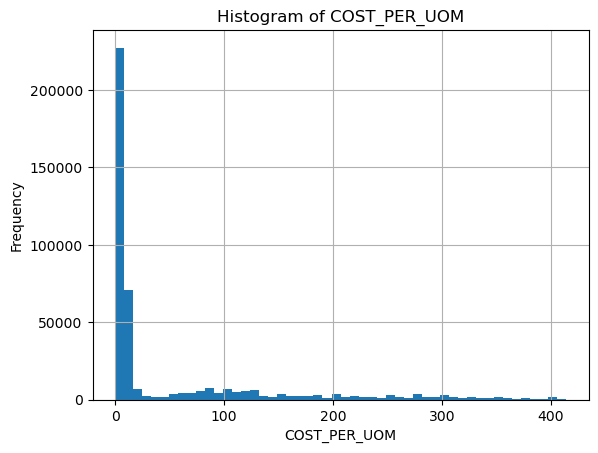

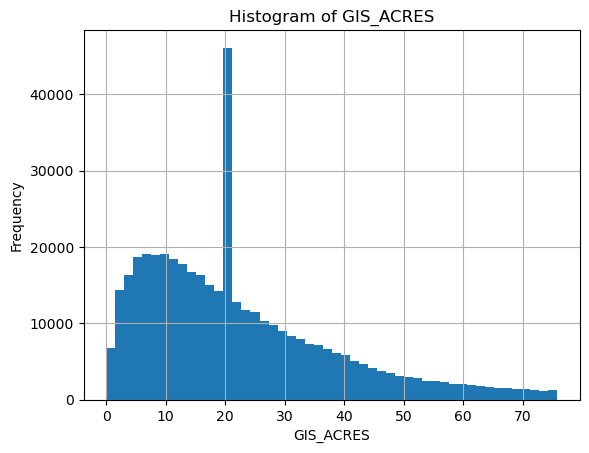

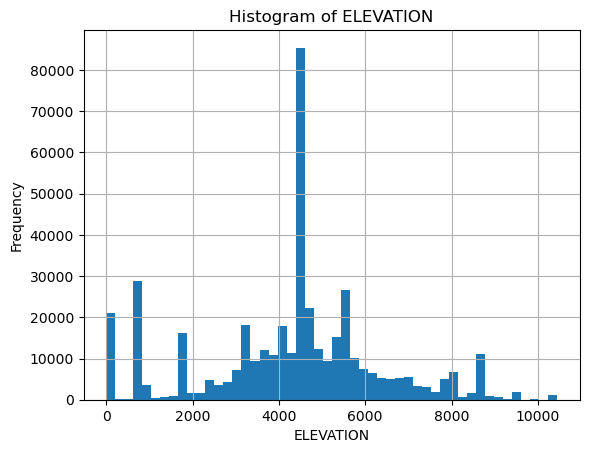

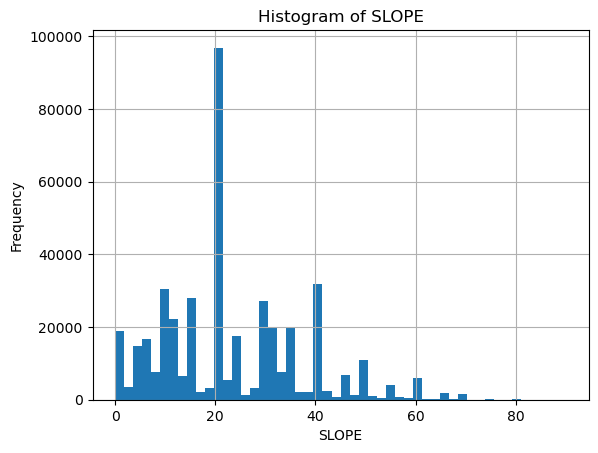

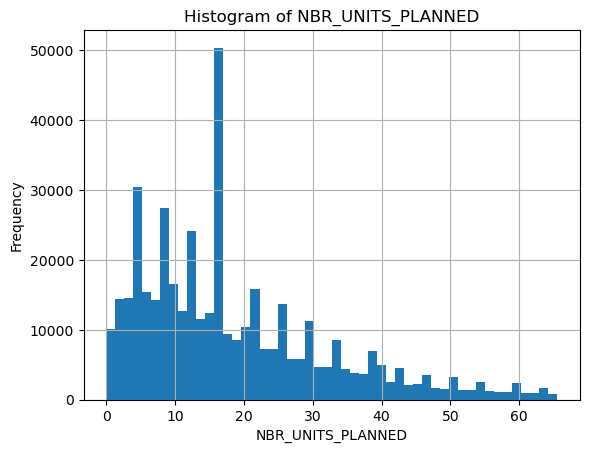

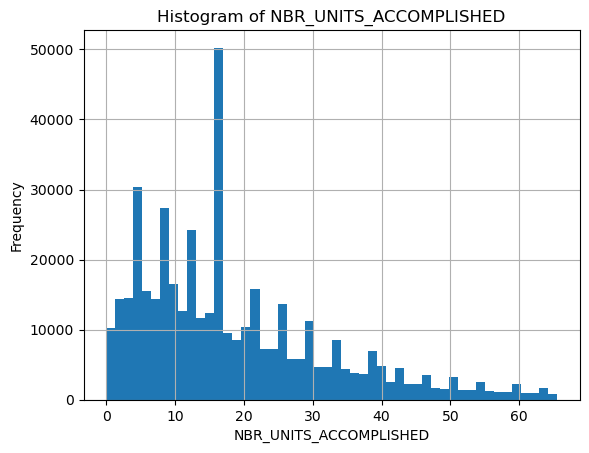

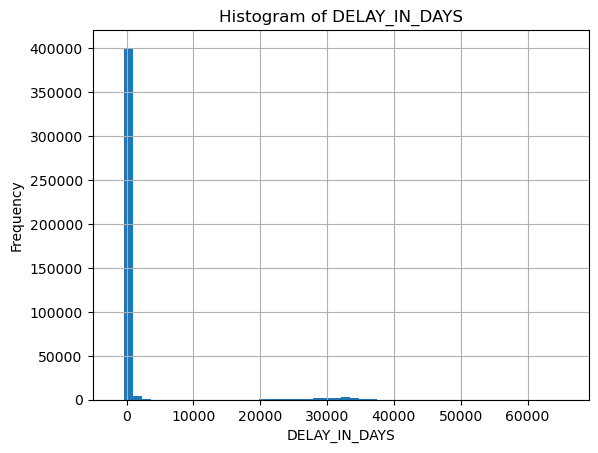

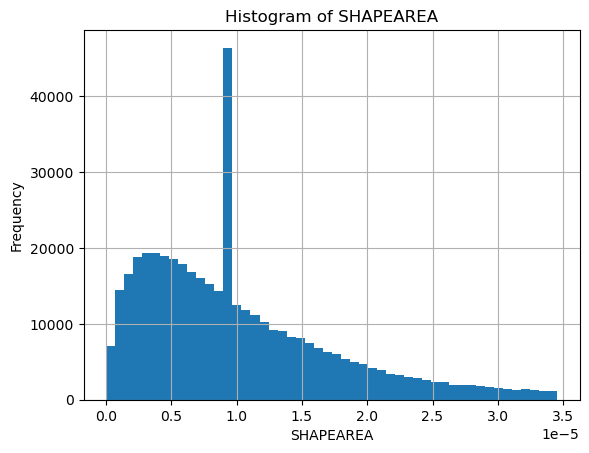

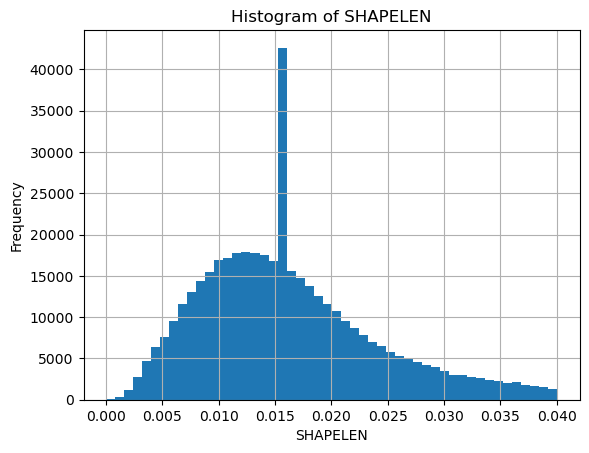

In [22]:
histos = [
    'COST_PER_UOM', 'GIS_ACRES', 'ELEVATION', 'SLOPE', 'NBR_UNITS_PLANNED', 'NBR_UNITS_ACCOMPLISHED', 'DELAY_IN_DAYS', 'SHAPEAREA', 'SHAPELEN'
]

for col in histos:
    df[col].hist(bins=50)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

- Box Plot
- Check the Distribution Type of Fields
- Describe Data Skews
- Pearson Correlation Coefficient
- Scatter Plot with Regression

# Box Plot
This shows a horizontal boxplot to visualize the spread and outliers of the values in that column. 
It creates and displays one plot at a time by column data based on the "histos" list which as a reminder has all the columns that are able to numerically be counted.

Columns RECAP Info:
- COST_PER_UOM - estimated cost per unit of measure in $$
- GIS ACRES - geographic area in acres
- ELEVATION - average elevation of treated area
- SLOPE - percent slope or incline of the land
- NBR_UNITS_PLANNED - number of units planned for treatment
- NBR_UNITS_ACCOMPLISHED - number of units actually treated
- DELAY_IN_DAYS - number of extra days after the scheduled date, it took for an activity to be completed
- SHAPEAREA - polygon area of the spatial unit in (map coordinate units squared)^2
- SHAPELEN - perimeter length of the unit in (map coordinate units squared)

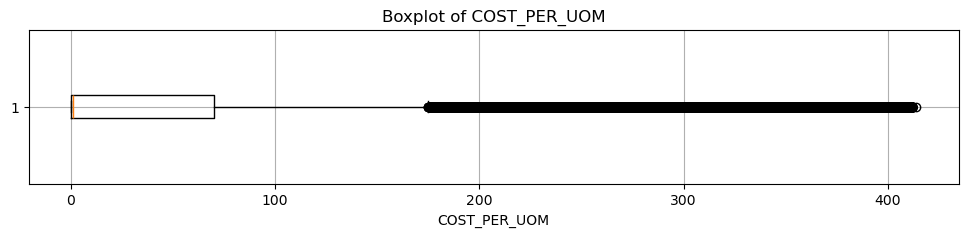

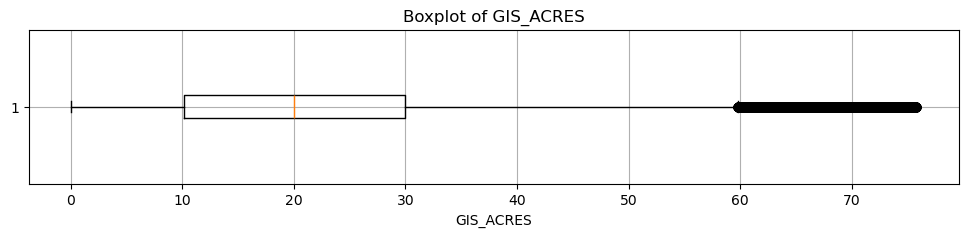

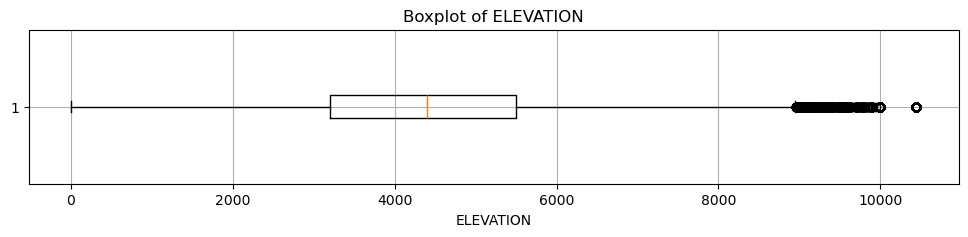

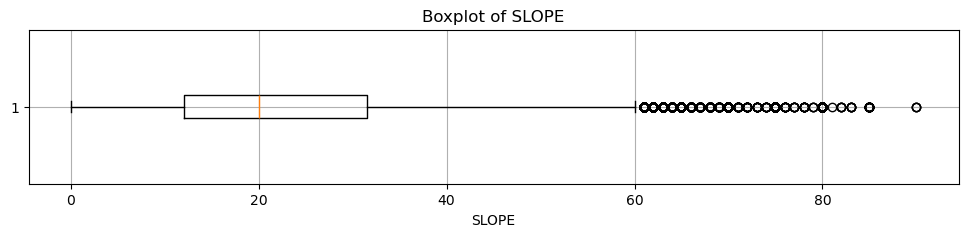

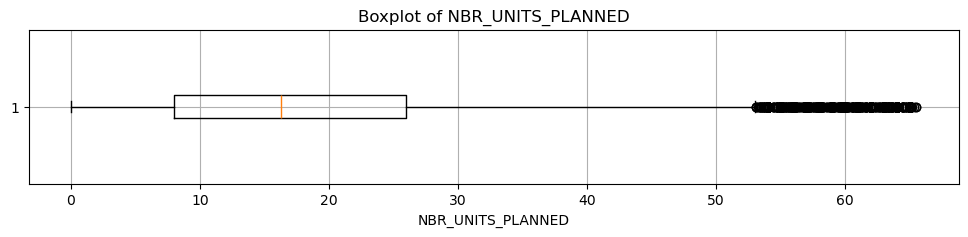

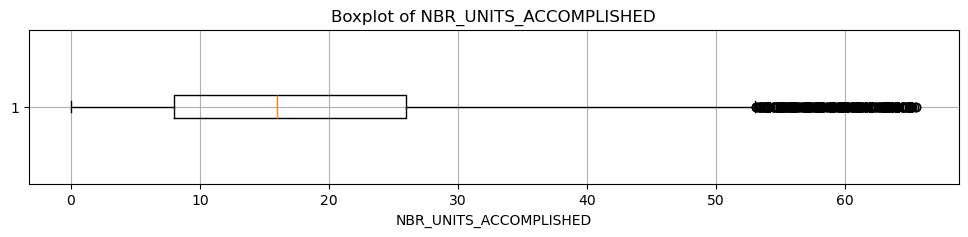

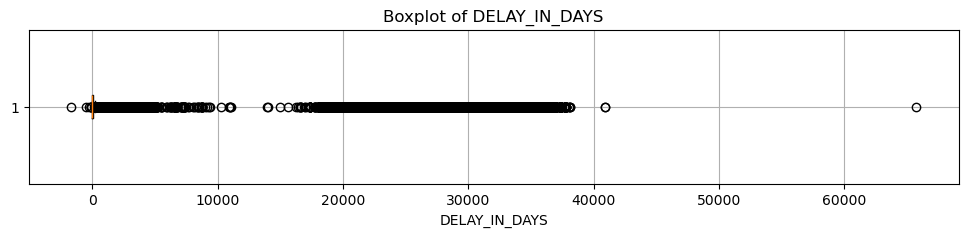

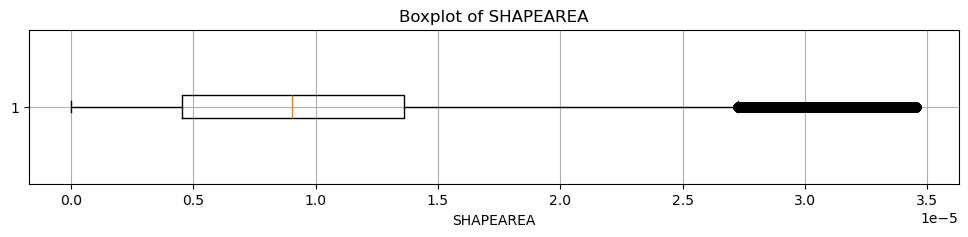

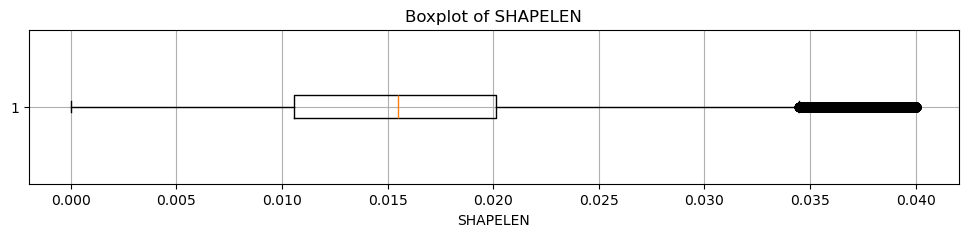

In [23]:
for col in histos:
    if col in df.columns:
        plt.figure(figsize=(12, 2))
        plt.boxplot(df[col].dropna(), vert=False)
        plt.title('Boxplot of ' + col)
        plt.xlabel(col)
        plt.grid(True)
        plt.show()

# Check the Distribution Type of Fields
- The code loops through each column name in the histos list. 
- For each column that exists in the DataFrame df, it calculates the skewness
- skewness = which measures how symmetric or skewed the data is.
- then prints the column name along with its skewness value (rounded to 2 decimal places).

    - Positive skew = right-skewed
    - negative skew = left-skewed
    - zero = symmetric distribution
    
* basically it shows how the data is "leaning" and how far it is from a normal bell curve distribution

In [17]:
for col in histos:
    if col in df.columns:
        skewness = df[col].skew()
        print(col + ": Skewness = " + str(round(skewness, 2)))

COST_PER_UOM: Skewness = 2.03
GIS_ACRES: Skewness = 1.1
ELEVATION: Skewness = -0.06
SLOPE: Skewness = 0.71
NBR_UNITS_PLANNED: Skewness = 1.1
NBR_UNITS_ACCOMPLISHED: Skewness = 1.1
DELAY_IN_DAYS: Skewness = 4.69
SHAPEAREA: Skewness = 1.11
SHAPELEN: Skewness = 0.78


# Data Skew Description
For each valid column, it prints 4 stats info:
- Skewness – Tells if the data is lopsided or symmetrical
    - positive = More small numbers, a few big ones (tail on the right)
    - negative = More big numbers, a few small ones (tail on the left)
    - close to 0 = Balanced like a bell curve
- Mean – The average value
- Median – The middle value
- Standard Deviation – How spread out the numbers are
    - higher # = more variation
    - lower # = more consistent data

In [24]:
for col in histos:
    if col in df.columns:
        print(col + ":")
        print("  Skewness: " + str(round(df[col].skew(), 2)))
        print("  Mean: " + str(round(df[col].mean(), 2)))
        print("  Median: " + str(round(df[col].median(), 2)))
        print("  Standard Deviation: " + str(round(df[col].std(), 2)))
        print()

COST_PER_UOM:
  Skewness: 2.03
  Mean: 51.49
  Median: 1.0
  Standard Deviation: 92.74

GIS_ACRES:
  Skewness: 1.1
  Mean: 22.15
  Median: 19.96
  Standard Deviation: 15.9

ELEVATION:
  Skewness: -0.06
  Mean: 4283.94
  Median: 4400.0
  Standard Deviation: 2105.29

SLOPE:
  Skewness: 0.71
  Mean: 23.24
  Median: 20.0
  Standard Deviation: 14.38

NBR_UNITS_PLANNED:
  Skewness: 1.1
  Mean: 18.67
  Median: 16.3
  Standard Deviation: 13.89

NBR_UNITS_ACCOMPLISHED:
  Skewness: 1.1
  Mean: 18.62
  Median: 16.0
  Standard Deviation: 13.9

DELAY_IN_DAYS:
  Skewness: 4.69
  Mean: 1319.03
  Median: 0.0
  Standard Deviation: 5981.78

SHAPEAREA:
  Skewness: 1.11
  Mean: 0.0
  Median: 0.0
  Standard Deviation: 0.0

SHAPELEN:
  Skewness: 0.78
  Mean: 0.02
  Median: 0.02
  Standard Deviation: 0.01



# Pearson Correlation Coefficient
this checks how much each feature is connected to every other feature, then shows it in the matrix chart

the chart itself shows how each numeric column is related to others with numbers

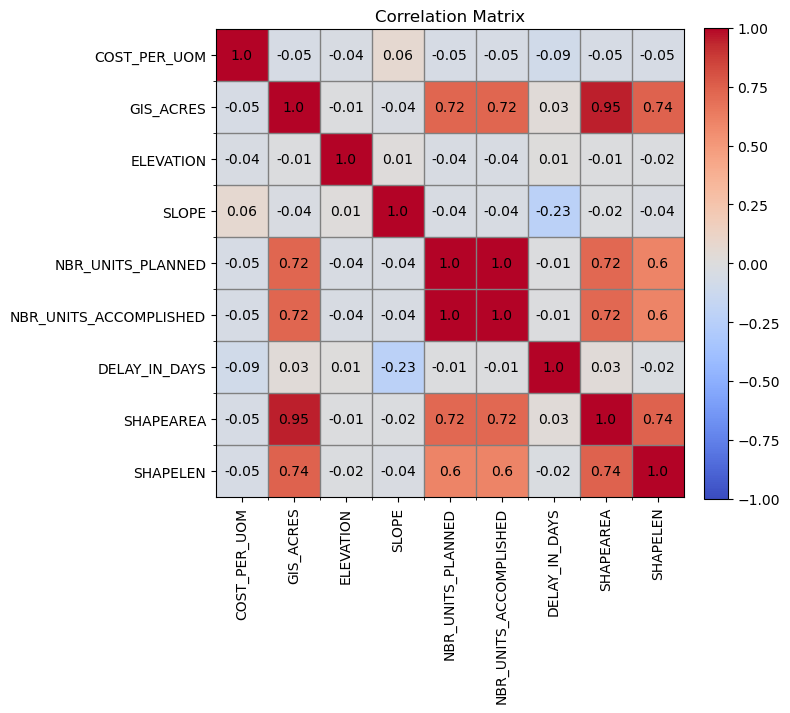

In [25]:
corr = df[histos].corr(method='pearson')

fig, ax = plt.subplots(figsize=(8, 8))

x = list(corr.columns)
positions = range(len(x))

ax.set_xticks(positions)
ax.set_yticks(positions)
ax.set_xticklabels(x, rotation=90)
ax.set_yticklabels(x)

for i in positions:
    for j in positions:
        value = round(corr.iloc[i, j], 2)
        ax.text(j, i, str(value), ha='center', va='center', color='black')

minor_x_ticks = []
minor_y_ticks = []

for i in range(1, len(x)):
    minor_x_ticks.append(i - 0.5)
    minor_y_ticks.append(i - 0.5)

ax.set_xticks(minor_x_ticks, minor=True)
ax.set_yticks(minor_y_ticks, minor=True)

ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)

empty_background = [[0 for _ in x] for _ in x]
ax.imshow(empty_background, cmap='gray', alpha=0)

cax = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Scatter Plot with Regression Line
for the scatter plot I analayze 2 columns the GIS_ACRES and the COST_PER_UOM (which is alot of point as you can see from the diagram) and then draw a line through the dots to best follow the pattern and observe the trend observing if cost goes up when acres go up.

(attempted to try to spread the table to see the points better but could not figure out a method that worked so far so the red line was the compromise, if have any ideas please feel free to let me know and will try them out)

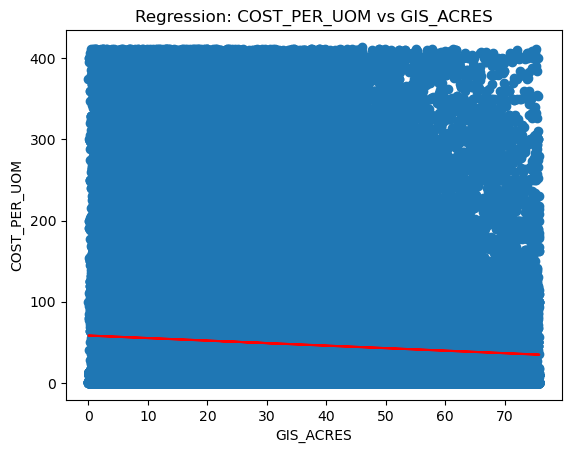

In [26]:
# Remove rows with missing values in both columns
df_temp = df[["GIS_ACRES", "COST_PER_UOM"]].dropna()

x = df_temp["GIS_ACRES"]
y = df_temp["COST_PER_UOM"]

# Find the line that best fits the data
slope, intercept = np.polyfit(x, y, 1)
reg_line = slope * x + intercept

# Make the plot
plt.scatter(x, y)
plt.plot(x, reg_line, color="red")
plt.xlabel("GIS_ACRES")
plt.ylabel("COST_PER_UOM")
plt.title("Regression: COST_PER_UOM vs GIS_ACRES")
plt.show()

# Determining Whether Classification, Regression, or K-Clustering is Appropriate
Our main objective with this exploration is to determine the cost effectiveness of reforestation and for other parties to use our data to predict the cost effectiveness for their own reforestation efforts. 

Thus, we will be using a **Linear Regression with Gradient Descent** to predict the cost effectiveness. 

# Spliting Data to Training and Test Sets
Before applying gradient descent method, we are going to first normalize our data and then manually split it into training and testing sets.

In [35]:
def normalize_data(target_col):
    # Separate features and target feature
    land_data = df2[histos].drop(columns=target_col)
    target = df2[target_col]

    # Drop columns with zero std (to avoid division by zero)
    stds = land_data.std()
    non_zero_std_cols = stds[stds != 0].index
    land_data = land_data[non_zero_std_cols]

    # Normalize the features - Z score
    land_data = (land_data - land_data.mean()) / land_data.std()

    # Z Score: Standard Deviation of 1 w/ Mean of 0
    land_data.insert(0, "bias", 1)

    land_data = land_data.to_numpy()
    target = target.to_numpy().reshape(-1, 1)

    # Replace NaN/infinite values with 0
    land_data = np.nan_to_num(land_data, nan=0.0, posinf=0.0, neginf=0.0)
    target = np.nan_to_num(target, nan=0.0, posinf=0.0, neginf=0.0)
    return land_data, target

def train_test_split(X, y, test_ratio=0.2, seed=123):
    np.random.seed(seed)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_ratio)
    test_idx = indices[:test_size]
    train_idx = indices[test_size:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx], train_idx, test_idx

df2 = df.copy()
land_data, costs = normalize_data("COST_PER_UOM")
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(land_data, costs)

# Gradient Descent
Here we are implementing the gradient descent algorithm and printing out the Root Mean Squared Error (RMSE) for at least 10 epochs.


In [36]:
def mean_squared_error(y_pred, y_actual):
    return np.mean((y_pred - y_actual) ** 2)

def predict(X, weights):
    # Vectorized prediction for optimization
    return X @ weights

def gradient_descent(X, y, alpha=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros((n, 1))  # Make it 2D for matrix ops
    y = y.reshape(-1, 1)        # Ensure y is also 2D

    for epoch in range(epochs):
        y_pred = predict(X, weights)
        gradient = (2 / m) * X.T @ (y_pred - y)
        weights -= alpha * gradient

        if epoch < 10:
            rmse = np.sqrt(mean_squared_error(y_pred, y))
            print(f"Epoch {epoch+1}, RMSE: {rmse:.4f}")

    return weights

# Train the model
weights = gradient_descent(X_train, y_train)

# Evaluate
y_test_pred = predict(X_test, weights)
test_rmse = np.sqrt(mean_squared_error(y_test_pred, y_test.reshape(-1, 1)))

Epoch 1, RMSE: 105.8188
Epoch 2, RMSE: 105.2825
Epoch 3, RMSE: 104.7675
Epoch 4, RMSE: 104.2727
Epoch 5, RMSE: 103.7973
Epoch 6, RMSE: 103.3402
Epoch 7, RMSE: 102.9008
Epoch 8, RMSE: 102.4782
Epoch 9, RMSE: 102.0717
Epoch 10, RMSE: 101.6806


# Plotting Linear Regression

We are plotting our test set for predicting COST_PER_UOM

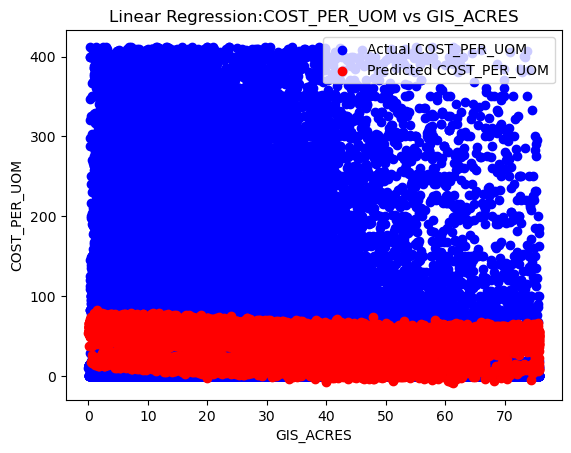

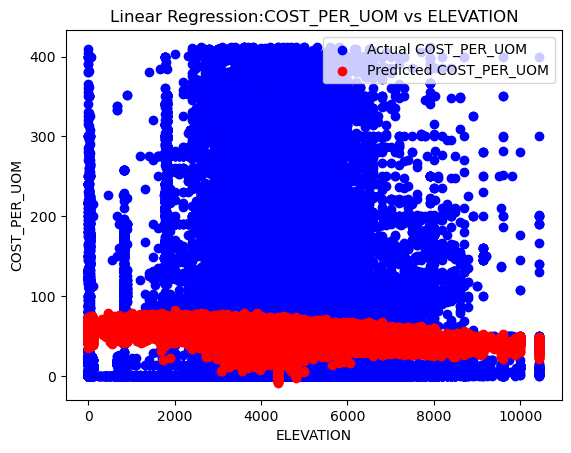

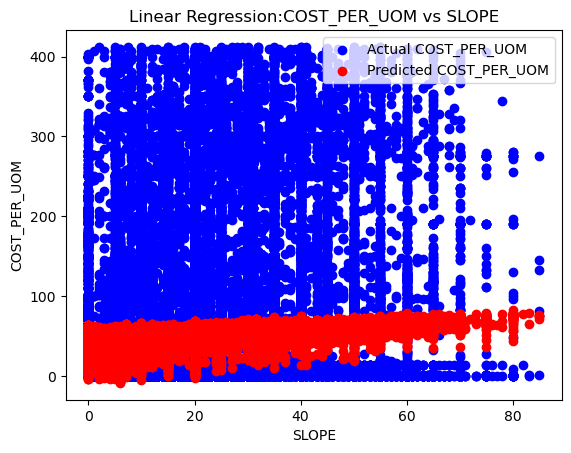

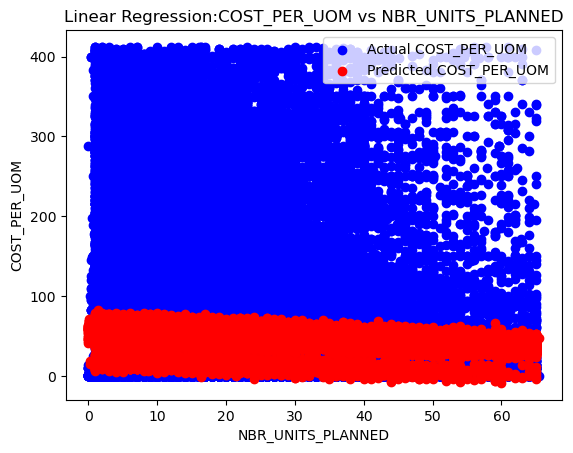

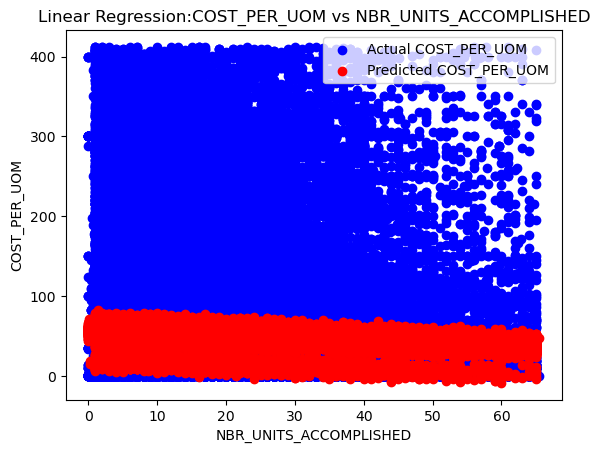

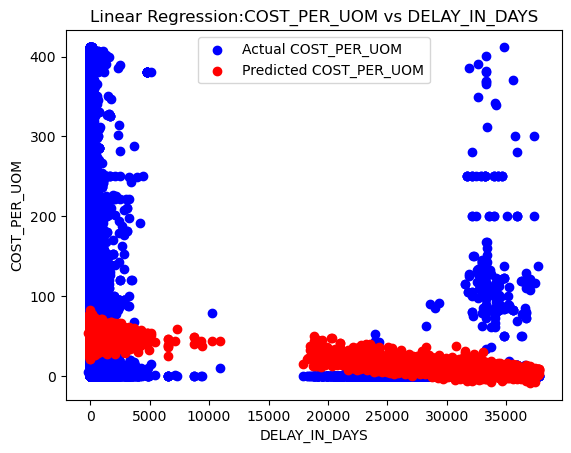

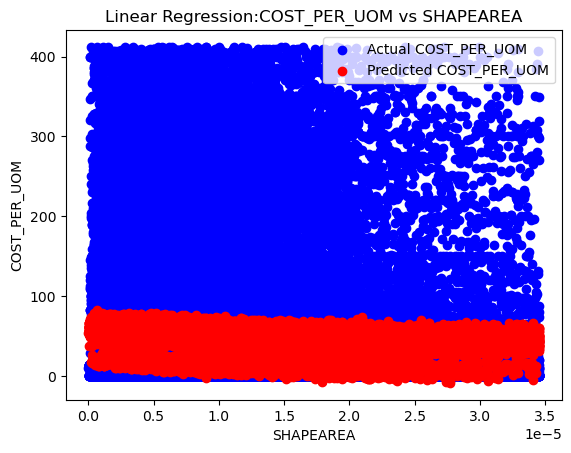

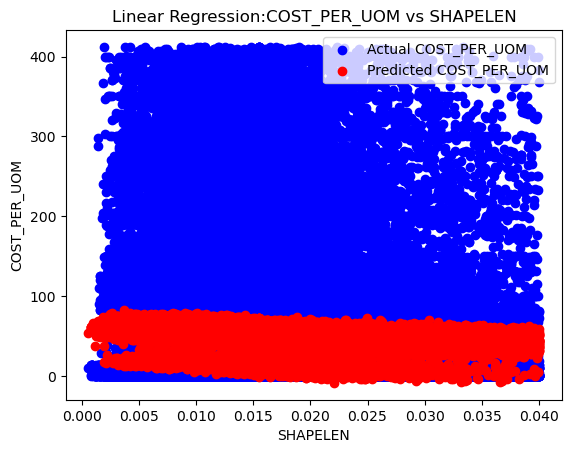

In [37]:
def linear_regression(target_col, col):
    # Scatter plot of actual vs predicted for the test set
    plt.scatter(df2.iloc[test_idx][col], y_test, color="blue", label="Actual " + target_col)
    plt.scatter(df2.iloc[test_idx][col], y_test_pred, color="red", label="Predicted " + target_col)

    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.title("Linear Regression:" + target_col + " vs " + col)
    plt.legend()
    plt.show()

# Call the function to plot
columns = ['GIS_ACRES', 'ELEVATION', 'SLOPE', 'NBR_UNITS_PLANNED', 'NBR_UNITS_ACCOMPLISHED', 'DELAY_IN_DAYS', 'SHAPEAREA', 'SHAPELEN']
target_col = 'COST_PER_UOM'
for col in columns:
    linear_regression(target_col, col)

# R-squared and Regression Fit
We are calculating the r-squared of our COST_PER_UOM model and evaluating how our regression fits.

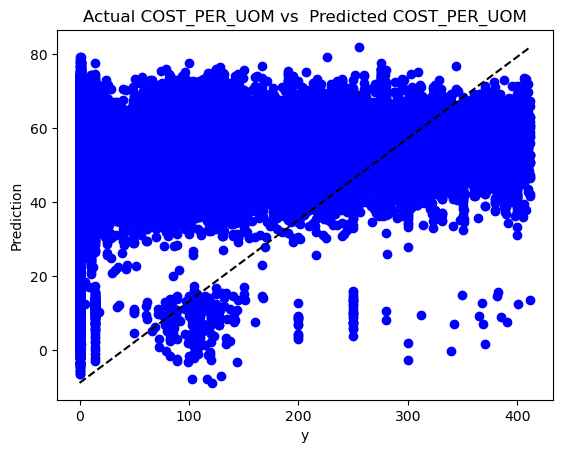

R^2: 0.014712283907182266


In [38]:
def calc_r2(y, y_pred):
    rss = np.sum((y - y_pred) ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (rss / tss)
    return r2

def regression_fit(y_test, y_test_pred, target_col):    
    plt.scatter(y_test, y_test_pred, color="blue")
    plt.xlabel("y")
    plt.ylabel("Prediction")
    plt.title("Actual " + target_col + " vs " + " Predicted " + target_col)
    plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color="black", linestyle="--")
    plt.show()

    print(f"R^2: {calc_r2(y_test, y_test_pred)}")

regression_fit(y_test, y_test_pred, target_col)

# Observing other Correlations
Based on our low r-square value and that the correlations between the cost per unit of measurement (COST_PER_UOM) and the other columns we can conclude that our model is not adequate enough to predict the cost effectiveness of a reforestation project. That being said there are other columns worth noting for a successful reforestation project: the acres of a project and project delays.

Thus, we want to observe the regressions between the following:

- GIS_ACRES v. NBR_UNITS_ACCOMPLISHED
- GIS_ACRES v. SHAPE_AREA
- GIS_ACRES v. SHAPE_LEN
- GIS_ACRES v. DELAY_IN_DAYS
- DELAY_IN_DAYS v. SLOPE

That way we can predict the number of acres a project can realistically achieve as well as predict the delays.

Epoch 1, RMSE: 27.2623
Epoch 2, RMSE: 26.4448
Epoch 3, RMSE: 25.6744
Epoch 4, RMSE: 24.9475
Epoch 5, RMSE: 24.2607
Epoch 6, RMSE: 23.6110
Epoch 7, RMSE: 22.9954
Epoch 8, RMSE: 22.4113
Epoch 9, RMSE: 21.8564
Epoch 10, RMSE: 21.3284


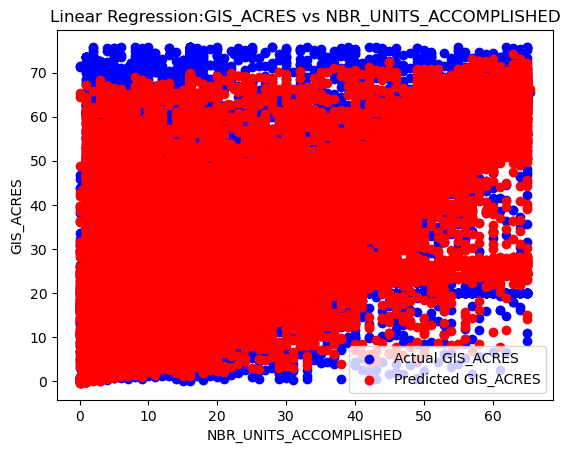

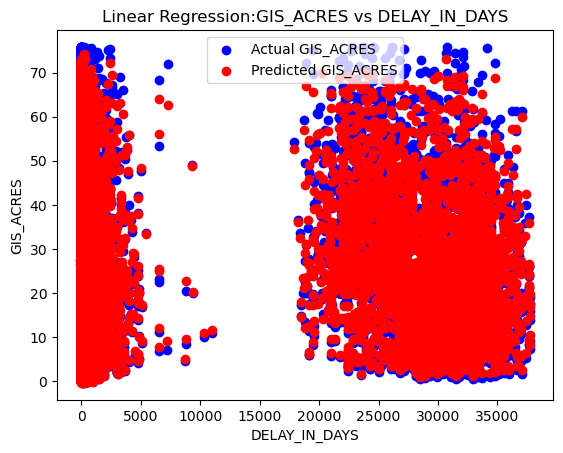

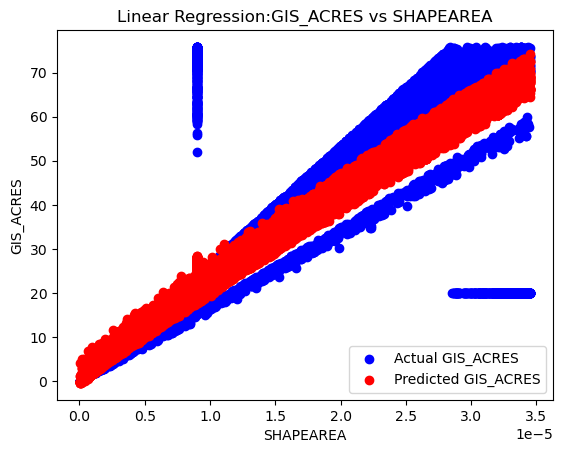

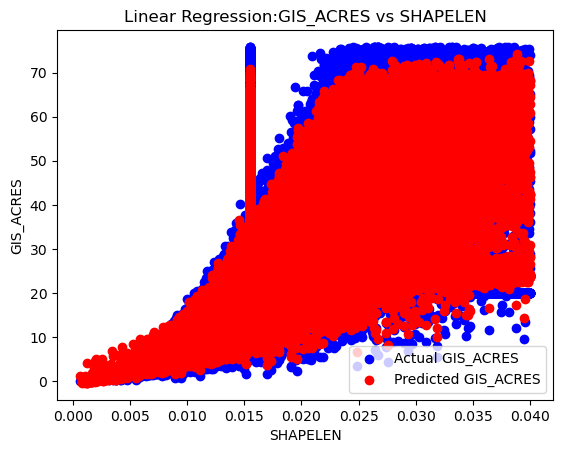

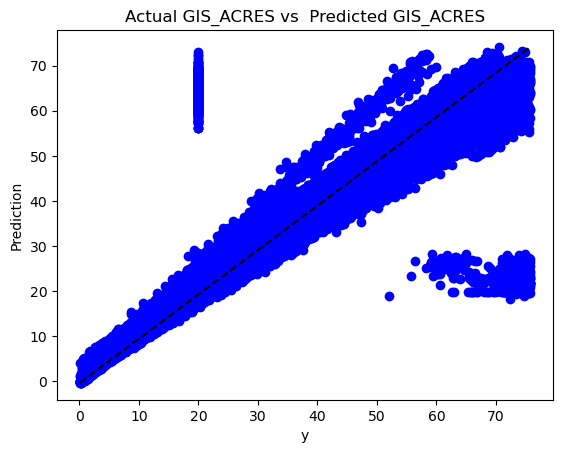

R^2: 0.8991497147872447


In [39]:
# Normalize & Split Data
land_data, acres = normalize_data("GIS_ACRES")
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(land_data, acres)

# Train the model
weights = gradient_descent(X_train, y_train)

# Evaluate
y_test_pred = predict(X_test, weights)
test_rmse = np.sqrt(mean_squared_error(y_test_pred, y_test.reshape(-1, 1)))

# Plot Linear Regression
columns = ['NBR_UNITS_ACCOMPLISHED', 'DELAY_IN_DAYS', 'SHAPEAREA', 'SHAPELEN']
target_col = 'GIS_ACRES'
for col in columns:
    linear_regression(target_col, col)

# Plot R-sqare & Regression Fit
regression_fit(y_test, y_test_pred, target_col)

Epoch 1, RMSE: 6083.0131
Epoch 2, RMSE: 6070.1240
Epoch 3, RMSE: 6057.7251
Epoch 4, RMSE: 6045.7979
Epoch 5, RMSE: 6034.3248
Epoch 6, RMSE: 6023.2886
Epoch 7, RMSE: 6012.6730
Epoch 8, RMSE: 6002.4622
Epoch 9, RMSE: 5992.6409
Epoch 10, RMSE: 5983.1944


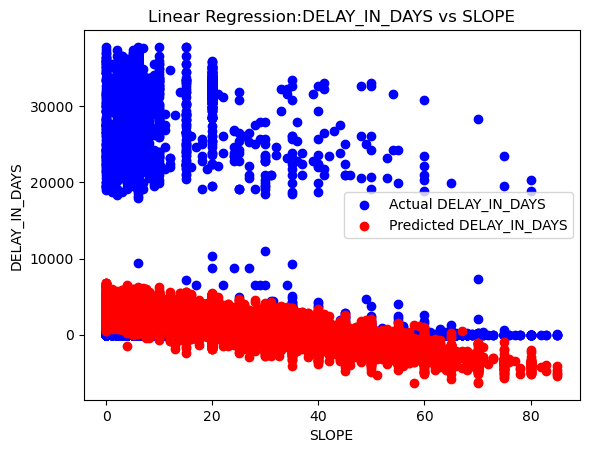

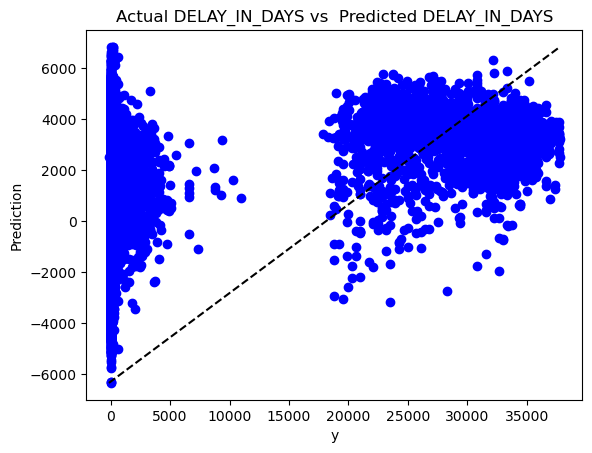

R^2: 0.067730579459649


In [40]:
# Normalize & Split Data
land_data, delays = normalize_data("DELAY_IN_DAYS")
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(land_data, delays)

# Train the model
weights = gradient_descent(X_train, y_train)

# Evaluate
y_test_pred = predict(X_test, weights)
test_rmse = np.sqrt(mean_squared_error(y_test_pred, y_test.reshape(-1, 1)))

# Plot Linear Regression
columns = ['SLOPE']
target_col = 'DELAY_IN_DAYS'
for col in columns:
    linear_regression(target_col, col)

# Plot R-sqare & Regression Fit
regression_fit(y_test, y_test_pred, target_col)